In [1]:
from sklearn import datasets
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Filter method:
  We filter and take only the subset of the relevant features. The model is build after selecting the features.
  The filter here is done using correlation matrix and commonly done using pearson correlation matrix

In [2]:
# load the boston housing prices dataset
d= datasets.load_boston()

In [3]:
X = d.data

In [4]:
(m,n) = X.shape

In [5]:
Y = np.reshape(d.target, (m,1))

In [6]:
# construct dataframe of 
df = pd.DataFrame(X, columns=list(d.feature_names))

# add the target column to the database
df['MEDV'] = Y 

In [7]:
# find the correlaton matrix ( pearson correlation matrix)
cor = df.corr()
cor

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


But not looking attractive, Lets use seaborn to visualize better

In [8]:
import seaborn as sns

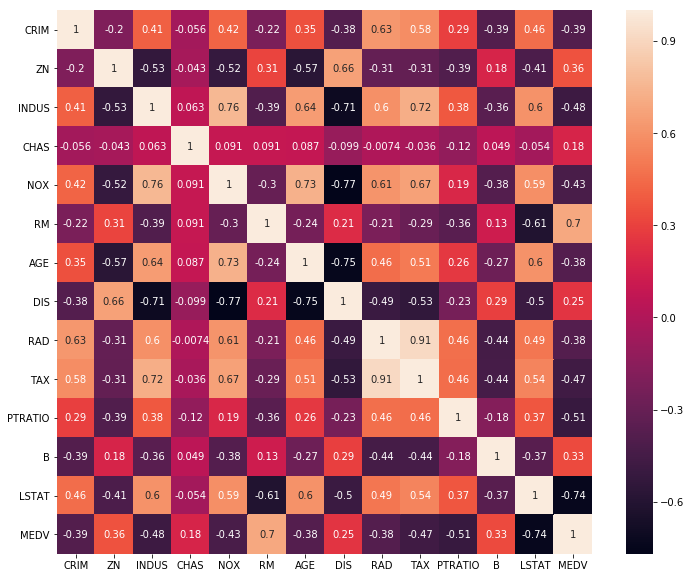

In [9]:
# plot the pearson correlation heat map 
plt.figure(figsize=(12,10))
sns.heatmap(cor, annot=True)
plt.show()

Correlation value range is [-1,1]

if the correlation value is close to 0, then independent feature and the target are weakly correlated

if the correlation value is close to -1, then independent feature and the target are stronger negatively correlated

if the correlation value is close to 1, then independent feature and the target are stronger positively correlated

we may consider the values if abs(correlation value b/w independent & target)>.50

# We can consider RM, PTRATIO, LSTAT, whos  absolute(corr)>.50

# Remember: Important assumption of linear regression is that the independent variables need to be uncorrelated with each other

In [11]:
# Corrleation b/w RM and PTRATIO
df[['RM', 'PTRATIO']].corr()

,RM,PTRATIO
RM,1.000000,-0.355501
PTRATIO,-0.355501,1.000000


In [12]:
# Corrleation b/w RM and LSTAT
df[['RM', 'LSTAT']].corr()

,RM,LSTAT
RM,1.000000,-0.613808
LSTAT,-0.613808,1.000000


In [13]:
# Corrleation b/w PTRATIO and LSTAT
df[['PTRATIO', 'LSTAT']].corr()

,PTRATIO,LSTAT
PTRATIO,1.000000,0.374044
LSTAT,0.374044,1.000000


RM, LSTAT are highly correlated (it could be negative or positive). Hence, we need to consider only one between RM and LSTAT. Lets consider LSTAT(.74) which has more corrleation with the target variable than the RM(.7).


Now we build model based on these two features only ( LSTAT, PTRATIO).